## Optimal Saving

#### John Stachurski

Misc imports

In [1]:
import numpy as np
import quantecon as qe
import matplotlib.pyplot as plt
from numba import jit, prange
from quantecon.util import tic, toc

Pull our class out:

In [2]:
from optsaving import SavingsProblem

Generate an instance

In [3]:
sp = SavingsProblem(x_grid_size=200, x_grid_max=120)

Run and time:

In [4]:
tic()
v_star, π = sp.value_function_iteration()
toc()

Error at iteration 25 is 0.31858006298503483.
Error at iteration 50 is 0.10164295886865204.
Error at iteration 75 is 0.03588382183205141.
Error at iteration 100 is 0.012666724535069562.
Error at iteration 125 is 0.004465351091734959.
Error at iteration 150 is 0.001574686443841955.
Error at iteration 175 is 0.0005556438378704343.
Error at iteration 200 is 0.00019618673723797997.

Converged in 217 iterations.
TOC: Elapsed: 0:00:4.71


4.714865446090698

Let's see what happens when we simulate assets under the approximate optimal policy:

In [5]:
x = sp.x_grid
Q = sp.Q

@jit(nopython=True)
def simulate_assets(i_init=100, j_init=0, ts_length=10000):
    
    i_series = np.empty(ts_length, dtype=np.int_)
    i_series[0] = i_init
    j = j_init
    
    for t in range(ts_length-1):
        i_series[t+1] = π[i_series[t], j]
        j = qe.random.draw(np.cumsum(Q[j, :]))
        
    return x[i_series]

In [6]:
x_series = simulate_assets()

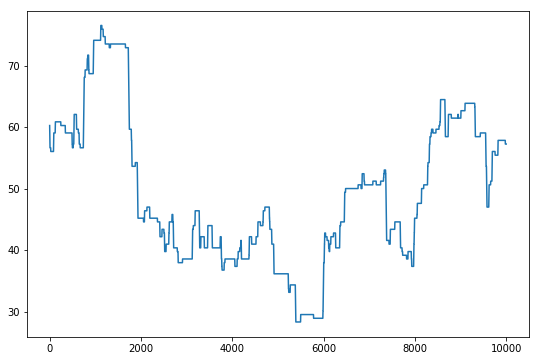

In [7]:
fig, ax = plt.subplots(figsize=(9, 6))
ax.plot(x_series)
plt.show()